# 2.1~ 2.2 웹 크롤링으로 웹 데이터 가져오기(네이버 뉴스)

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 주소를 입력
source_url = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100"

options = webdriver.ChromeOptions() # 크롭 브라우저의 옵션을 설정
service = Service(executable_path=ChromeDriverManager().install()) # 운영체제에 맞는 크롭 드라이버를 자동 설치

# 사이트의 html 구조에 기반하여 크롤링을 수행
driver = webdriver.Chrome(service=service, options=options) # 크롭 웹 드라이브를 초기화 후 옵션 전달하여 브라우저를 엶
driver.get(source_url) # 해당 url로 브라우저를 이동
req = driver.page_source # 현재 페이지의 HTML 소스를 문자열로 가져옴
soup = BeautifulSoup(req, 'html.parser') # req를 파싱하여 Beautiful 객체 생성 -> 파이썬이 이해하기 쉬운형태로 변환
cluster_text = soup.find_all(name="div", attrs={"class":"sa_text"}) # 특정 클래스(sa_text)를 가진 div 태그를 찾아냄

# a 태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성
page_urls = []
for idx in range(0, len(cluster_text)):
    cluster = cluster_text[idx]
    news_url = cluster.find(name='a', attrs={"class":"sa_text_title"}) # 특정 클래스(sa_text_title)를 가진 a 태그를 찾아냄
    if news_url is not None:
        page_urls.append(news_url.get("href")) # href의 속성, 즉 링크 주소를 가져옴

# 중복 url을 제거
page_urls = list(set(page_urls))

# 5개의 페이지를 출력
for page in page_urls[:5]:
    print(page)

# 크롤링에 사용한 브라우저를 종료
driver.close()

https://n.news.naver.com/mnews/article/011/0004363035
https://n.news.naver.com/mnews/article/025/0003371725
https://n.news.naver.com/mnews/article/022/0003948406
https://n.news.naver.com/mnews/article/214/0001359471
https://n.news.naver.com/mnews/article/003/0012651293


In [2]:
len(cluster_text)

46

In [3]:
#페이지 내 텍스트 구조 확인
driver = webdriver.Chrome(service=service, options=options)

driver.get(page_urls[0]) # 해당 url로 브라우저를 이동
req = driver.page_source # 현재 페이지의 html 소스코드를 가져옴
soup = BeautifulSoup(req, 'html.parser') # html을 파싱

title_area = soup.find(name="div", attrs={"class":"media_end_head_title"}) # 클래스가 "media_end_head_title"인 div 태그를 찾음
title = title_area.find_all('h2')[0] # h2 태그를 찾아 제목을 가져
content_paragraphs = soup.find(name="div", attrs={"class":"newsct_article"}) # 클래스가 "newsct_article"인 div 태그를 찾음
content_corpus = content_paragraphs.text # 기사 내용을 포함하는 텍스트를 추출

print(title.text) # 기사 제목을 출력
print(content_corpus) # 기사 내용을 출력

driver.close() 

이재명, 다음주 연임 도전 공식화


8·18 전대 9~10일 후보 접수李 민생·비전 출마 메시지 전망김두관 출마 기류에도 ‘또대명’친명 최고위원 후보들 윤곽도



7일 국회 더불어민주당 당대표실 앞에 8·18 전당대회 대표·최고위원 후보 등록 공고문이 붙어 있다. 연합뉴스[서울경제] 이재명 전 더불어민주당 대표의 연임 도전 선언이 임박하면서 이 전 대표의 ‘2기 지도부’ 구성도 가시화하고 있다. 이 전 대표가 연임에 도전하며 던질 메시지와 최고위원 다섯 자리를 둘러싼 ‘친명(친이재명)’ 후보들의 경쟁에 관심이 쏠린다.7일 정치권에 따르면 이 전 대표는 8·18 전당대회 후보 등록일인 9~10일에 맞춰 당 대표 출마를 선언할 예정이다. 지난달 24일 대표직에서 물러난 뒤 출마 메시지를 고심해온 이 전 대표는 윤석열 정부의 실정을 짚고 민생·경제 분야에서 성과를 내겠다는 각오를 밝힘과 동시에 민주당의 차기 대선 집권 비전을 언급할 것으로 알려졌다.김두관 전 의원도 당 대표 출마 의사를 굳히면서 경선의 모양새는 갖춰질 것으로 보인다. 김 전 의원은 5일 경남도당위원장에서도 사퇴하며 출마 준비를 본격화한 상태다. 하지만 김 전 의원이 대항마로 나서도 ‘또대명(또 대표는 이재명)’ 분위기를 흔들기는 어렵다는 관측이 지배적이다. 당내에서는 김 전 의원이 ‘들러리’에 그칠 수 있다는 우려도 나온다.이 전 대표와 함께 지도부를 구성할 최고위원 대진표도 윤곽이 드러나고 있다. 이 전 대표가 지난 총선 당시 직접 영입한 이언주 의원은 이날 국회에서 기자회견을 열고 “도움을 청했던 이 전 대표를 비롯한 당원 동지에게 승리를 가져다 드리고 싶다”며 최고위원 출마를 선언했다. 앞서 4선 김민석 의원과 재선 강선우·김병주·한준호 의원, 초선 이성윤 의원, 원외 정봉주 전 의원 등이 출마를 밝혔고 민형배·전현희 의원도 이르면 8일 출사표를 던질 계획이다.민주당은 최고위원 후보자가 9명 이상일 경우 14일 예비경선을 통해 후보 8명을 추리기로 했다. 이후 이달 20일 제주도 당원대회를

In [4]:
title_area

<div class="media_end_head_title">
<h2 class="media_end_head_headline" id="title_area"><span>이재명, 다음주 연임 도전 공식화</span></h2>
</div>

In [5]:
import pandas as pd

# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비
columns = ["title", "content_text"]
dfs = []

# 각 페이지 별 '제목', '본문' 정보를 데이터 프레임으로 만듦
for page_url in page_urls:
    driver = webdriver.Chrome(service=service, options=options)
    driver.get(page_url)
    req = driver.page_source
    soup = BeautifulSoup(req, 'html.parser')

    title_area = soup.find(name="div", attrs={"class":"media_end_head_title"})
    title = title_area.find('h2')
    content_paragraphs = soup.find(name="div", attrs={"class":"newsct_article"})
    content_corpus = content_paragraphs.text

    # 제목 정보에서 개행 문자를 제거 후 추출. 없으면 빈 문자열로 대체
    if title is not None:
        row_title = title.text.replace('\n', ' ')
    else:
        row_title = ""

    df = pd.DataFrame([[row_title, content_corpus]], columns=columns)
    dfs.append(df)
    
    driver.close()

# 모든 정보를 하나의 데이터 프레임에 저장
df = pd.concat(dfs, ignore_index=True) # 데이터프레임을 하나로 결합, 인덱스를 재설정하여 새로운 인덱스를 생성
df.head()

,title,content_text
0,"이재명, 다음주 연임 도전 공식화",\n\n8·18 전대 9~10일 후보 접수李 민생·비전 출마 메시지 전망김두관 출마...
1,"전대에 거리두는 용산 ""개입 안해, 대통령실 끌어들이지 말라""",\n\n\t\t\t 대통령실은 7일 한동훈 국민의힘 당대표 후보와 김건희 여사 간...
2,"민주, 檢의 ‘경기도 법카 유용 의혹’ 이재명 부부 소환 통보에 “제물 삼기 중단해야”","\n\n수원지검, 이재명 전 더불어민주당 대표 측에 소환조사 통보더불어민주당 검찰독..."
3,"""영부인 폰 압수수색해야""‥""국정농단 가능성"" 직격",\n\n\n\n \n\n\n\n 광고 후 계속됩니다. 다음 subject...
4,"나경원, 원·한 공방 격화에 ""이래서 그들은 총선 졌던 것""","\n\n""패배 브라더스 진풍경""\n\n\n\n[청주=뉴시스] 조성현 기자 = 나경원..."


In [6]:
import re

# 한국어 문자열에서 한글 자모음만 남기고 나머지 문자들을 제거하는 함수
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글 자모음과 음절을 제외한 모든 문자 (^는 부정 문자 클래스)
    result = hangul.sub('', text) # 해당 정규 표현식에 매치되는 부분을 빈 문자열로 치환
    return result

print(text_cleaning(df['content_text'][0]))

 전대 일 후보 접수 민생비전 출마 메시지 전망김두관 출마 기류에도 또대명친명 최고위원 후보들 윤곽도일 국회 더불어민주당 당대표실 앞에  전당대회 대표최고위원 후보 등록 공고문이 붙어 있다 연합뉴스서울경제 이재명 전 더불어민주당 대표의 연임 도전 선언이 임박하면서 이 전 대표의 기 지도부 구성도 가시화하고 있다 이 전 대표가 연임에 도전하며 던질 메시지와 최고위원 다섯 자리를 둘러싼 친명친이재명 후보들의 경쟁에 관심이 쏠린다일 정치권에 따르면 이 전 대표는  전당대회 후보 등록일인 일에 맞춰 당 대표 출마를 선언할 예정이다 지난달 일 대표직에서 물러난 뒤 출마 메시지를 고심해온 이 전 대표는 윤석열 정부의 실정을 짚고 민생경제 분야에서 성과를 내겠다는 각오를 밝힘과 동시에 민주당의 차기 대선 집권 비전을 언급할 것으로 알려졌다김두관 전 의원도 당 대표 출마 의사를 굳히면서 경선의 모양새는 갖춰질 것으로 보인다 김 전 의원은 일 경남도당위원장에서도 사퇴하며 출마 준비를 본격화한 상태다 하지만 김 전 의원이 대항마로 나서도 또대명또 대표는 이재명 분위기를 흔들기는 어렵다는 관측이 지배적이다 당내에서는 김 전 의원이 들러리에 그칠 수 있다는 우려도 나온다이 전 대표와 함께 지도부를 구성할 최고위원 대진표도 윤곽이 드러나고 있다 이 전 대표가 지난 총선 당시 직접 영입한 이언주 의원은 이날 국회에서 기자회견을 열고 도움을 청했던 이 전 대표를 비롯한 당원 동지에게 승리를 가져다 드리고 싶다며 최고위원 출마를 선언했다 앞서 선 김민석 의원과 재선 강선우김병주한준호 의원 초선 이성윤 의원 원외 정봉주 전 의원 등이 출마를 밝혔고 민형배전현희 의원도 이르면 일 출사표를 던질 계획이다민주당은 최고위원 후보자가 명 이상일 경우 일 예비경선을 통해 후보 명을 추리기로 했다 이후 이달 일 제주도 당원대회를 시작으로 전당대회의 막이 오른다 친명계 최고위원 후보들 사이에서 이 전 대표를 지키겠다 윤석열 대통령을 탄핵하기 위해 섰다 등 강경 발언이 난무하는 상황에서 명심 경쟁과 선명성

In [7]:
# 모든 데이터에 전처리 적용하기
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))

df.head(5)

,title,content_text
0,이재명 다음주 연임 도전 공식화,전대 일 후보 접수 민생비전 출마 메시지 전망김두관 출마 기류에도 또대명친명 최고...
1,전대에 거리두는 용산 개입 안해 대통령실 끌어들이지 말라,대통령실은 일 한동훈 국민의힘 당대표 후보와 김건희 여사 간 문자 논란에 대해 ...
2,민주 의 경기도 법카 유용 의혹 이재명 부부 소환 통보에 제물 삼기 중단해야,수원지검 이재명 전 더불어민주당 대표 측에 소환조사 통보더불어민주당 검찰독재정치탄압...
3,영부인 폰 압수수색해야국정농단 가능성 직격,광고 후 계속됩니다 다음 취소 재생 ...
4,나경원 원한 공방 격화에 이래서 그들은 총선 졌던 것,패배 브라더스 진풍경청주뉴시스 조성현 기자 나경원 국민의힘 당대표 후보가 일 오후...


In [8]:
#각 피처마다 말뭉치를 생성
title_corpus = "".join(df['title'].tolist()) # title 열을 리스트로 만들고 합치기
content_corpus = "".join(df['content_text'].tolist()) # content_text 열을 리스트로 만들고 합치기
print(title_corpus)

이재명 다음주 연임 도전 공식화전대에 거리두는 용산 개입 안해 대통령실 끌어들이지 말라민주 의 경기도 법카 유용 의혹 이재명 부부 소환 통보에 제물 삼기 중단해야영부인 폰 압수수색해야국정농단 가능성 직격나경원 원한 공방 격화에 이래서 그들은 총선 졌던 것북한 김일성 주기 앞두고김정은 받들 때 김일성 소원 실현나경원원희룡윤상현 읽씹 논란 맹공한동훈 구태 극복친한계 제 연판장 논란에 구태정치당 무너뜨리는 자해극해군 인력난에 부사관 선발 필기시험 폐지검사탄핵방통위원장 청문회 개원식도 못한 국회 월도 가시밭길참 무지하고 어리석다 정신 나갔네하다하다 또 친일 놓고 여야 티격태격읽씹 논란에 나경원원희룡윤상현 맹공한동훈 구태 극복 사퇴 요구 동참할거냐 모의 전대 제 연판장 논란김여사 문자에 친윤 정면충돌제연판장 우려도종합일각 채상병 특검법 한동훈 받자재표결때 이탈표 노림수검찰 경기도 법카 유용 의혹 이재명 부부에 소환 통보종합국힘서 한동훈 연판장 돌자 취소말고 그냥 해라여사 문자 정국 요동제연판장 주장에  국정농단역풍에 제연판장 없던 일로 한동훈측 장 만들어도 못 막아검찰 이재명 부부 검찰 소환 통보소명할 기회 주는 차원 종합 사퇴요구 연판장 돌고있다 파행 치닫는  당권경쟁이재명 곧 연임도전 선언 어대명 비판 김두관에 쏠린 눈속보검찰 경기도 법카 유용 의혹 이재명 부부 소환 통보문재인김정숙 내외 럽스타그램 네티즌 분노웃음이 나옵니꽈여 문자 무시 논란 격화당무개입 해당행위윤심은 없지만 친윤은 있다흔들리는 용산의 전당대회 불개입론선관위  사퇴 연판장 논란에 구태정치 김여사 개입에  전대 막장드라마뻔뻔한 국정농단종합남은 사람은 김건희뿐검찰 디올백 수수 관련 여사팀 조사 마쳤다인 체제서 의결 땐 탄핵일 방통위원장 경고 날린 줌인 다른 나무 죽인다 낭설에 천대받는 산림녹화 일등공신박상용 검사 탄핵 기권 곽상언에 일부 민주당원들 징계하라홍준표 한동훈은 조작제일검국민의힘 파문 갈수록 확산대통령실 김여사 문자 논란에 국힘 전대 일체 개입 안 할 것허은아 국민의힘 자멸할 것실질 당 대표는

In [9]:
from konlpy.tag import Okt #한국어 형태소 추출 라이브러리
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus) # 명사 추출
count = Counter(nouns) # 각 명사의 빈도 수를 게산
count

Counter({'후보': 455,
         '것': 249,
         '대표': 236,
         '일': 206,
         '국민': 179,
         '전': 174,
         '이': 142,
         '힘': 137,
         '여사': 133,
         '연판': 131,
         '의원': 126,
         '민주당': 125,
         '한동훈': 124,
         '논란': 113,
         '등': 112,
         '문자': 112,
         '위원장': 110,
         '전당대회': 105,
         '대통령실': 95,
         '대통령': 94,
         '김': 92,
         '당': 78,
         '지난': 68,
         '원외': 67,
         '말': 67,
         '사퇴': 65,
         '위원': 64,
         '날': 64,
         '개입': 64,
         '의혹': 64,
         '관련': 61,
         '사과': 61,
         '국회': 60,
         '김건희': 60,
         '선거': 60,
         '검사': 59,
         '사태': 57,
         '당원': 53,
         '대해': 53,
         '대한': 53,
         '협': 52,
         '기자회견': 51,
         '탄핵': 50,
         '검찰': 49,
         '라며': 48,
         '요구': 48,
         '당시': 47,
         '최고': 45,
         '그': 45,
         '출마': 44,
         '수': 44,
         '년': 4

In [10]:
# 한 글자 키워드 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'후보': 455, '대표': 236, '국민': 179, '여사': 133, '연판': 131, '의원': 126, '민주당': 125, '한동훈': 124, '논란': 113, '문자': 112, '위원장': 110, '전당대회': 105, '대통령실': 95, '대통령': 94, '지난': 68, '원외': 67, '사퇴': 65, '위원': 64, '개입': 64, '의혹': 64, '관련': 61, '사과': 61, '국회': 60, '김건희': 60, '선거': 60, '검사': 59, '사태': 57, '당원': 53, '대해': 53, '대한': 53, '기자회견': 51, '탄핵': 50, '검찰': 49, '라며': 48, '요구': 48, '당시': 47, '최고': 45, '출마': 44, '비판': 44, '원희룡': 42, '주장': 42, '일부': 40, '무시': 39, '수사': 39, '기자': 39, '사진': 39, '캠프': 39, '총선': 38, '서울': 37, '이재명': 37, '나경원': 37, '행위': 37, '조사': 37, '연합뉴스': 34, '위원회': 34, '과정': 33, '자신': 33, '정치': 33, '사건': 33, '우리': 33, '이번': 32, '출석': 32, '사실': 32, '다른': 32, '윤석열': 31, '동지': 31, '통해': 31, '오후': 31, '관계자': 30, '법인': 30, '카드': 30, '인사': 29, '당권': 29, '경기도': 27, '주자': 27, '구태': 27, '위해': 26, '지금': 26, '촉구': 26, '혐의': 25, '취소': 25, '강조': 25, '특검법': 25, '경선': 24, '조직': 24, '페이스북': 24, '선관위': 24, '아까시나무': 24, '김혜경': 23, '여당': 23, '나무': 23, '사람': 22, '당무': 22, '참석': 22, '전대': 21, '

In [11]:
# 불용어 데이터 파일
korean_stopwords_path = 'data/korean_stopwords.txt'

# 텍스트 파일 오픈
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords] # 양쪽 끝에서 공백이나 개행 문자 제거
print(stopwords[:10]) # 불용어 10개 출력

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [12]:
# 키워드 데이터에서 불용어 제거
remove_char_counter = Counter({x: remove_char_counter[x] for x in remove_char_counter if x not in stopwords})
print(remove_char_counter)

Counter({'후보': 455, '대표': 236, '국민': 179, '여사': 133, '연판': 131, '의원': 126, '민주당': 125, '한동훈': 124, '논란': 113, '문자': 112, '위원장': 110, '전당대회': 105, '대통령실': 95, '대통령': 94, '지난': 68, '원외': 67, '사퇴': 65, '위원': 64, '개입': 64, '의혹': 64, '관련': 61, '사과': 61, '국회': 60, '김건희': 60, '선거': 60, '검사': 59, '사태': 57, '당원': 53, '대해': 53, '대한': 53, '기자회견': 51, '탄핵': 50, '검찰': 49, '라며': 48, '요구': 48, '당시': 47, '최고': 45, '출마': 44, '비판': 44, '원희룡': 42, '주장': 42, '일부': 40, '무시': 39, '수사': 39, '기자': 39, '사진': 39, '캠프': 39, '총선': 38, '서울': 37, '이재명': 37, '나경원': 37, '행위': 37, '조사': 37, '연합뉴스': 34, '위원회': 34, '과정': 33, '정치': 33, '사건': 33, '출석': 32, '사실': 32, '윤석열': 31, '동지': 31, '통해': 31, '오후': 31, '관계자': 30, '법인': 30, '카드': 30, '인사': 29, '당권': 29, '경기도': 27, '주자': 27, '구태': 27, '위해': 26, '지금': 26, '촉구': 26, '혐의': 25, '취소': 25, '강조': 25, '특검법': 25, '경선': 24, '조직': 24, '페이스북': 24, '선관위': 24, '아까시나무': 24, '김혜경': 23, '여당': 23, '나무': 23, '사람': 22, '당무': 22, '참석': 22, '전대': 21, '도부': 21, '지난해': 21, '공개': 21, '전화': 21, 

pygame 2.5.2 (SDL 2.28.3, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


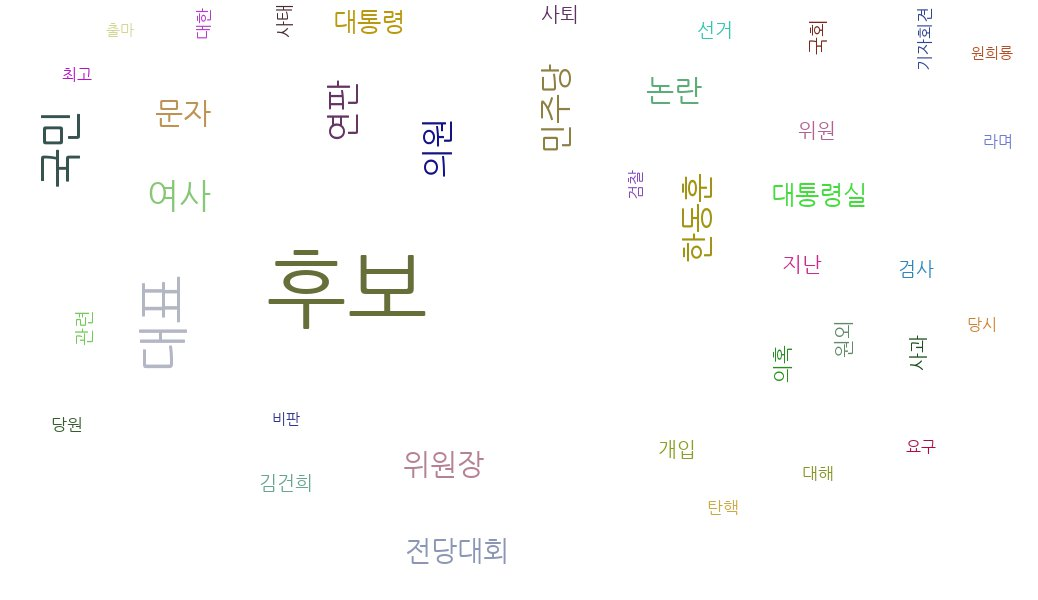

In [13]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력. 단어 출력의 최대 크기는 80으로 제한
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지 생성. 폰트는 나눔 고딕을 사용
pytagcloud.create_tag_image(taglist, 'data/wordcloud.jpg', size=(1200, 600), fontname='NanumGothic', rectangular=False) # 직사각형이 아닌 원형으로 생성

# 생성한 이미지를 주피터 노트북 상에서 출력
from IPython.display import Image
Image(filename='data/wordcloud.jpg')
